<a href="https://colab.research.google.com/github/PosgradoMNA/A01793027_Actividades_de_aprendizaje_Carlos_Daniel_Mendoza_Paz/blob/main/Semana_6_IBM_Modulo3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Ciencia y Analitica de datos**
##**Data Analysis with Python**
##Alumno: Carlos Daniel Mendoza Paz
##Matricula: A01793027


-------------------------------------------------
##**Module 3: Exploratory Data Analysis**
-------------------------------------------------


En este módulo se tratarán temas sobre como hacer exploración de datos, mejor conocido como "EDA" por sus siglas en ingles.

EDA nos ayudará a:
* Descubrir relaciones entre diferentes variables 
* Resumir características principales sobre los datos para un mejor entendimiento de ellos
* Extraer variables importantes para el problema que intentamos resolver

Durante este módulo aprenderémos:
* Técnicas de exploración de datos
* Estadistica descriptiva
* Como agrupar datos 
* El método ANOVA
* La correlación entre diferentes variables
* Metodos estadisticos de correlación. Pearson & Heatmaps




Para poder hacer los ejemplos de los videos primero vamos a necesitar descargar el dataset. Para ello debemos ejecutar el siguiente código.

In [7]:
import pandas as pd
import numpy as np

In [8]:
filename = "/content/sample_data/automobileEDA.csv"

In [9]:
df = pd.read_csv(filename)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


Vamos a utilizar la función describe(). Lo que esta función hace basicamente es calcular valores estadisticos basicos de todos las variables que contengan valores numéricos que tiene mi dataset.
Los valores que son NaN son omitidos.

In [10]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


Cuando tenemos **Variables Categoricas** debemos de utilizar la siguiente función **value_counts()** la cual nos ayudará a contar el numero de datos que tenemos por cada variable categorica.

In [11]:
df.value_counts()

symboling  normalized-losses  make           aspiration  num-of-doors  body-style  drive-wheels  engine-location  wheel-base  length    width     height  curb-weight  engine-type  num-of-cylinders  engine-size  fuel-system  bore  stroke  compression-ratio  horsepower  peak-rpm  city-mpg  highway-mpg  price    city-L/100km  horsepower-binned  diesel  gas
-2         103                volvo          std         four          sedan       rwd           front            104.3       0.907256  0.933333  56.2    2912         ohc          four              141          mpfi         3.78  3.15    9.5                114.0       5400.0    23        28           12940.0  10.217391     Medium             0       1      1
 1         128                nissan         std         two           sedan       fwd           front            94.5        0.794330  0.886111  54.5    2017         ohc          four              103          idi          2.99  3.47    21.9               55.0        4800.0    45  

In [12]:
#Vamos a ver nuestra variable categorica drive wheel
drive_wheels_counts=df["drive-wheels"].value_counts
print(drive_wheels_counts)

<bound method IndexOpsMixin.value_counts of 0      rwd
1      rwd
2      rwd
3      fwd
4      4wd
      ... 
196    rwd
197    rwd
198    rwd
199    rwd
200    rwd
Name: drive-wheels, Length: 201, dtype: object>


In [13]:
#Importamos la librería de matplot y la de seaborn para poder graficar
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

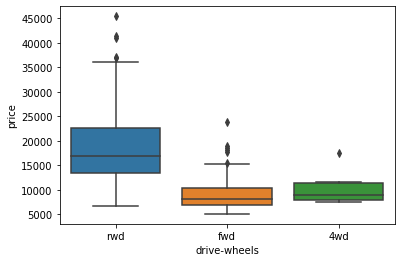

In [14]:
#Hacemos una gráfica de cajas y bigotes para ver la relación entre la variable precio y drive-wheels
sns.boxplot(x="drive-wheels", y="price",data=df)

Ahora vamos a crear un scatter plot para ver la relación que hay entre las variables "price" and "engine size" de esta manera vamos a tratar de entender si el tamaño del motor influye en el precio total del vehículo.

Vamos a tener dos variables:
* **Predictor Variable** Es la variable independiente y debe de ir en el eje de las **x**
* **Target variable** Es la variable dependiente y esta iría en el eje de las **y**.

Text(0, 0.5, 'Price')

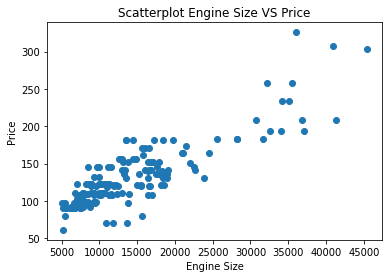

In [15]:
#Creamos el grafico de dispersión para ver la relación entre ambas variables
y = df["engine-size"]
x = df["price"]
plt.scatter(x,y)

#Le damos formato a nuestro gráfico de dispersión
plt.title("Scatterplot Engine Size VS Price")
plt.xlabel("Engine Size")
plt.ylabel("Price")

Basados en lo que observamos en el gráfico de dispersión nos podemos dar cuenta que entre mayor es el tamaño del motor, mayor es el precio del vehículo, lo que nos hace pensar que podemos tener una relación lineal positiva entre estas dos variables.

###**Agrupando datos**
Podemos agrupar datos en python para ver la relación entre ese grupo de datos. Para eso tenemos el metodo **Groupby()**.
Este metodo se puede aplicar en variables categóricas

Por ejemplo esta técnica nos puede ayudar a encontrar el precio promedio de los vehículos y como estos se comportan con base en los diferentes estilos de carrocería que tenemos

In [16]:
#Primero tomaremos las tres primeras columnas que usarémos de nuestro dataset
df_test = df[["drive-wheels","body-style","price"]]

In [17]:
#Ahora agrupamos nuestros datos
df_grp=df_test.groupby(["drive-wheels","body-style"],as_index=False).mean()
df_grp

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


###**Pivot Table**
Ahora que ya obtuvimos la tabla anterior, nos damos cuenta la relación del precio y los diferententes vehículos, pero podemos hacer uso ahora de una pivot table.

Una **pivot table** tiene una variable desplegada del lado de las columnas y una de lado de las filas.

In [18]:
#Creamos una pivottable usando las variables "drive-wheels" & "body-style"
df_pivot=df_grp.pivot(index="drive-wheels",columns="body-style")
df_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

Ahora vamos a crear un **heatmap**, esta es otra forma de representar una pivot table. Este gráfico es muy bueno para ver la relación de una variable vs varias mas. Y con base en la intensidad de color se mostrarán los valores mas grandes.

<function matplotlib.pyplot.show(*args, **kw)>

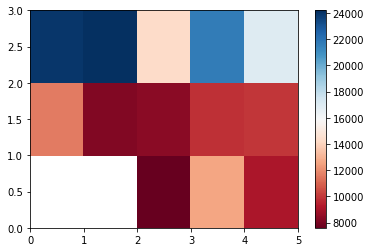

In [19]:
plt.pcolor(df_pivot, cmap="RdBu")
plt.colorbar()
plt.show

###**Análisis de la varianza ANOVA**
**ANOVA** por sus siglas en inglés significa **AN**alysis **Of** **VA**riance. Esta técnica nos ayuda a encontrar la correlación entre diferentes grupos de variables categóricas.
El ANOVA test nos va a regresar dos valores:
* **F-test score**: Calcula la relación de variación entre la media de los grupos sobre la variación
* **p-value**: Muestra si el resultado obtenido es estadísticamente significativo.

In [20]:
from scipy import stats

In [21]:
#Vamos a hacer el ANOVA entre dos grupos de vehículos "Honda" & "Subaru"
df_anova=df[["make","price"]]
grouped_anova=df_anova.groupby(["make"])
anova_results_1=stats.f_oneway(grouped_anova.get_group("honda")["price"],grouped_anova.get_group("subaru")["price"])
anova_results_1

F_onewayResult(statistic=0.19744030127462606, pvalue=0.6609478240622193)

In [22]:
#Vamos a hacer el ANOVA entre dos grupos de vehículos "Honda" & "Jaguar"
anova_results_2=stats.f_oneway(grouped_anova.get_group("honda")["price"],grouped_anova.get_group("jaguar")["price"])
anova_results_2

F_onewayResult(statistic=400.925870564337, pvalue=1.0586193512077862e-11)

Finalmente podemos decir que existe una fuerte correlación entre una variable categórica y otras variables, si la prueba ANOVA nos da un valor de prueba **F-test score**  y un valor de **p-value** pequeño.

##**Correlación**
La correlación entre las variables se refiere a que tan ligadas se encuentran unas de otras, por ejemplo si una de ellas cambia que tan afectadas se verá la otra.


Vamos a ver ahora la correlación entre las variables "Engine Size" & "Prices"

(0.0, 53158.49390597812)

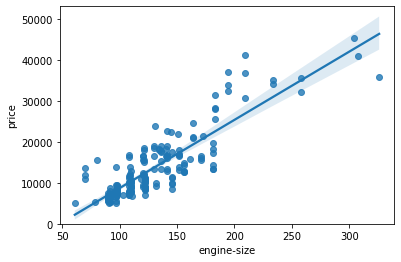

In [23]:
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)

Como podemos observar en esta gráfica, existe una correlación positiva entre ambas variables dado el caso que a medida que aumenta el "engine-size" el "precio" también aumenta.

Ahora en el siguiente ejemplo, vamos a ver la correlación que existe entre las variables "highway-mpg" & "prices"

(0.0, 48180.14029859804)

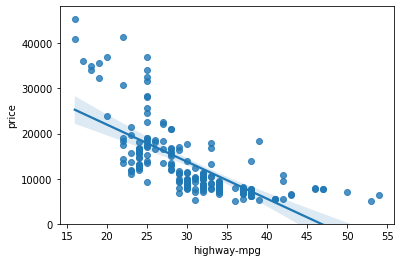

In [24]:
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

Como se puede observar en ese gráfico, tenemos una correlación lineal negativa, entre los galones por milla y el precio, a medida que los galones por milla aumentan, el precio disminuye.
Esto nos puede decir que la variable "highway-mpg" es un buen predictor de la variable precio, dada su correlación.

(0.0, 47414.1)

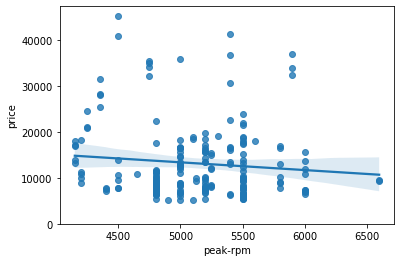

In [25]:
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

Ahora en este último gráfico, podemos observar una correlación muy debil entre la variable "peak-rpm" y "price" por lo tanto no podemos usar la variable "peak-rpm" para predecir el precio.

###**Correlación de Pearson**

Este metodo de correlación nos ayuda también a medir que tan fuerte es la correlación entre dos variables. Este metodo nos da dos valores, uno es el **Correlation Coeficient** y el otro es el **P-value** 

Como interpretar los resultados del **coeficiente de correlación:**
* Cerca a +1: Existe una fuerte correlación positiva
* Cerca a -1: Existe una fuerte correlación negativa
* Cerca a 0: No existe correlación

Como interpretar los resultados del **P-value**:
* P-value < 0.001: Fuerte certeza en el resultado
* P-value < 0.05: Moderada certeza en el resultado
* P-value < 0.1: Debil certeza en el resultado
* P-value > 0.1: Sin certeza en el resultado

**Strong Correlation** cuando:
* Coeficiente de correlación cercano a +1 o -1
* P-value menor a 0.001



In [26]:
#Vamos a calcular la correlación entre las variables "Horsepower" y "price"
pearson_coef, p_value = stats.pearsonr(df["horsepower"], df["price"])
print(f"Pearson Coeficient: {pearson_coef} \nP-value: {p_value}")

Pearson Coeficient: 0.8095745670036559 
P-value: 6.369057428260101e-48


#**Lab Module 3**


In [27]:
#Importamos nuestras librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [28]:
#Colocamos el path de nuestro dataset
path='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'

In [29]:
#Hacemos un head para ver los datos del df
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [30]:
#Verificamos los tipos de variables que tenemos en nuestro dataset
print(df.dtypes)

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object


###**Pregunta 1:** What is the data type of the column "peak-rpm"?

In [31]:
df["peak-rpm"].dtype

dtype('float64')

El tipo de dato para esta columna es float64

In [32]:
#Calculamos la correlación de todas las variables
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


##**Pregunta 2: Find the correlation between the following columns: bore, stroke, compression-ratio, and horsepower.**

In [33]:
correlacion=df[['bore','stroke','compression-ratio','horsepower']]

In [65]:
#Vemos que tipo de variables son las
print(correlacion.dtypes)

bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
dtype: object


In [34]:
#Sacamos la correlación de las cuatro variables que tenemos
correlacion.corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566936
stroke,-0.055390,1.000000,0.187923,0.098462
compression-ratio,0.001263,0.187923,1.000000,-0.214514
horsepower,0.566936,0.098462,-0.214514,1.000000


##**Continuous Numerical Variables:**


###Positive Linear Relationship
Let's find the scatterplot of "engine-size" and "price".

(0.0, 53197.20092919063)

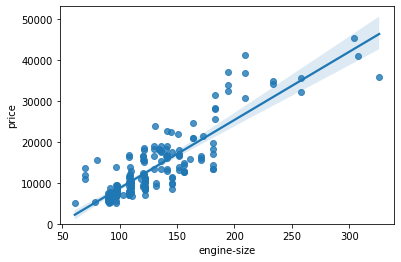

In [35]:
# Engine size as potential predictor variable of price
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)

Vamos a examinar la correlación entre el "engine-size" y el "price". Obtenemos una correlación de 0.87 entre estas dos variables.

In [37]:
df[["engine-size", "price"]].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


Vamos hacer una diagrama de dispersión para ver la correlación entre la variable "highway-mpg" and "price"

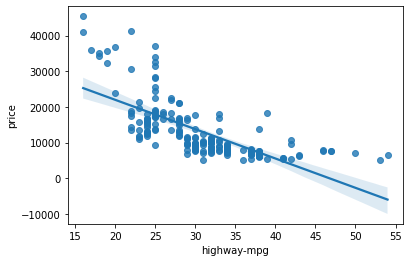

In [38]:
sns.regplot(x="highway-mpg", y="price", data=df)

A medida que aumenta el mpg en carretera, el precio baja: esto indica una relación inversa/negativa entre estas dos variables. El mpg en carretera podría ser potencialmente un predictor del precio.

Podemos examinar la correlación entre 'mpg en carretera' y 'precio' y ver que es aproximadamente -0.704.

In [39]:
df[['highway-mpg', 'price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


##Relación lineal débil

Veamos si "peak-rpm" es una variable predictora de "price".

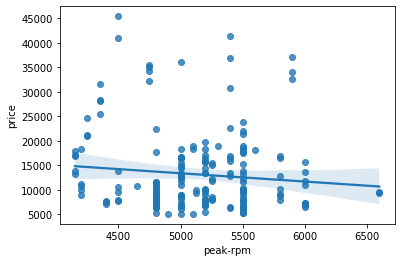

In [40]:
sns.regplot(x="peak-rpm", y="price", data=df)

Las rpm máximas no parecen ser un buen predictor del precio en absoluto, ya que la línea de regresión está cerca de la horizontal. Además, los puntos de datos están muy dispersos y lejos de la línea ajustada, mostrando mucha variabilidad. Por lo tanto, no es una variable confiable.

Podemos examinar la correlación entre 'peak-rpm' y 'price' y ver que es aproximadamente -0.101616.

In [41]:
df[['peak-rpm','price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


##Question 3 a): Find the correlation between x="stroke" and y="price".

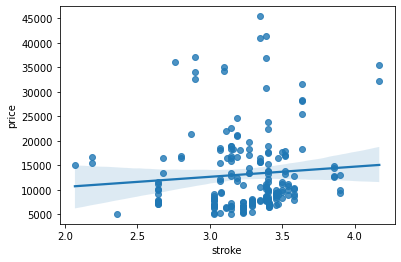

In [42]:
sns.regplot(x="stroke", y="price", data=df)

Como se puede observar en la gráfica, no existe una currelación entre ambas variables "price" & "sstroke"

##Question 3 b):

Given the correlation results between "price" and "stroke", do you expect a linear relationship?

In [45]:
df[["price","stroke"]].corr()

,price,stroke
price,1.00000,0.08231
stroke,0.08231,1.00000


Podría decir que no existe una correlación fuerte entre ambas variables dado que la correlación obtenida entre ambas es de 0.082, este es un valor que se encuentra muy alejado del 1, por ende tenemos una correlación muy debil.

##**Categorical Variables**

Estas son variables que describen una 'característica' de una unidad de datos y se seleccionan de un pequeño grupo de categorías. Las variables categóricas pueden tener el tipo "objeto" o "int64". Una buena manera de visualizar variables categóricas es mediante diagramas de caja.

Veamos la relación entre "body-style"" y "price".

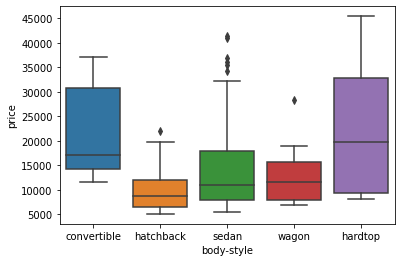

In [46]:
sns.boxplot(x="body-style", y="price", data=df)

Vemos que las distribuciones de precio entre las diferentes categorías de estilo de carrocería tienen una superposición significativa, por lo que el estilo de carrocería no sería un buen predictor del precio. Examinemos la "ubicación del motor" y el "precio" del motor:

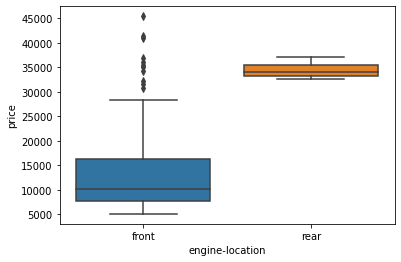

In [47]:
sns.boxplot(x="engine-location", y="price", data=df)

Aquí vemos que la distribución del precio entre estas dos categorías de ubicación del motor, delantera y trasera, son lo suficientemente distintas como para tomar la ubicación del motor como un buen predictor potencial del precio.

Examinemos "drive-wheels" y "price".

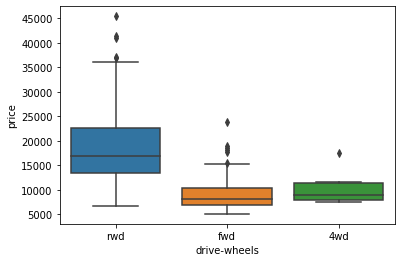

In [48]:
# drive-wheels
sns.boxplot(x="drive-wheels", y="price", data=df)

Aquí vemos que la distribución del precio entre las diferentes categorías de ruedas motrices es diferente. Como tal, las ruedas motrices podrían potencialmente predecir el precio.

##3. Descriptive Statistical Analysis

Primero echemos un vistazo a las variables utilizando un método de descripción.

La función describe calcula automáticamente estadísticas básicas para todas las variables continuas. Cualquier valor de NaN se omite automáticamente en estas estadísticas.

Esto mostrará:

* el conteo de esa variable
* el significado
* la desviación estándar (std)
* el valor mínimo
* el IQR (Rango Intercuartílico: 25%, 50% y 75%)
* el valor máximo
Podemos aplicar el método "describe" de la siguiente manera:

In [49]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


La configuración predeterminada de "describe" omite variables de tipo objeto. Podemos aplicar el método "describe" sobre las variables de tipo 'objeto' de la siguiente manera:

In [50]:
df.describe(include=['object'])

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201,200
unique,22,2,2,5,3,2,6,7,8,3
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,165,115,94,118,198,145,157,92,115


##Value Counts

Value Counts es una buena manera de entender cuántas unidades de cada característica/variable tenemos. Podemos aplicar el método "value_counts" en la columna "drive-wheels". No olvide que el método "value_counts" solo funciona en series de pandas, no en marcos de datos de pandas. Como resultado, solo incluimos un corchete df['drive-wheels'], no dos corchetes df[['drive-wheels']].

In [51]:
df['drive-wheels'].value_counts()

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

Podemos convertir la serie a un marco de datos de la siguiente manera:

In [53]:
df['drive-wheels'].value_counts().to_frame()

,drive-wheels
fwd,118
rwd,75
4wd,8


Repitamos los pasos anteriores, pero guardemos los resultados en el marco de datos "drive_wheels_counts" y cambiemos el nombre de la columna 'drive-wheels' a 'value_counts'.

In [54]:
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'}, inplace=True)
drive_wheels_counts

,value_counts
fwd,118
rwd,75
4wd,8


Ahora cambiemos el nombre del índice a 'drive-wheels':

In [56]:
drive_wheels_counts.index.name = 'drive-wheels'
drive_wheels_counts

,value_counts
drive-wheels,
fwd,118
rwd,75
4wd,8


In [57]:
# engine-location as variable
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts.head(10)

,value_counts
engine-location,
front,198
rear,3


Después de examinar los recuentos de valor de la ubicación del motor, vemos que la ubicación del motor no sería una buena variable de predicción del precio. Esto se debe a que solo tenemos tres autos con motor trasero y 198 con motor delantero, por lo que este resultado está sesgado. Por lo tanto, no podemos sacar ninguna conclusión sobre la ubicación del motor.

##4. Basics of Grouping


El método "groupby" agrupa los datos por diferentes categorías. Los datos se agrupan en función de una o varias variables, y el análisis se realiza en los grupos individuales.

Por ejemplo, agrupemos por la variable "drive-wheels". Vemos que hay 3 categorías diferentes de ruedas motrices.

In [58]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

Si queremos saber, en promedio, qué tipo de rueda motriz es más valiosa, podemos agrupar las "drive-wheels" y luego promediarlas.

Podemos seleccionar las columnas 'drive-wheels', 'body-style' y 'price', luego asignarlas a la variable "df_group_one".

In [59]:
df_group_one = df[['drive-wheels','body-style','price']]

Luego podemos calcular el precio promedio para cada una de las diferentes categorías de datos.

In [60]:
# grouping results
df_group_one = df_group_one.groupby(['drive-wheels'],as_index=False).mean()
df_group_one

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


Según nuestros datos, parece que los vehículos con tracción trasera son, en promedio, los más caros, mientras que los de 4 ruedas y los de tracción delantera tienen aproximadamente el mismo precio.

También puede agrupar por múltiples variables. Por ejemplo, agrupemos por 'ruedas motrices' y 'estilo de carrocería'. Esto agrupa el marco de datos por la combinación única de 'ruedas motrices' y 'estilo de carrocería'. Podemos almacenar los resultados en la variable 'grouped_test1'.

In [61]:
# grouping results
df_gptest = df[['drive-wheels','body-style','price']]
grouped_test1 = df_gptest.groupby(['drive-wheels','body-style'],as_index=False).mean()
grouped_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


Estos datos agrupados son mucho más fáciles de visualizar cuando se convierten en una tabla dinámica. Una tabla dinámica es como una hoja de cálculo de Excel, con una variable a lo largo de la columna y otra a lo largo de la fila. Podemos convertir el marco de datos en una tabla dinámica usando el método "pivote" para crear una tabla dinámica a partir de los grupos.

En este caso, dejaremos la variable drive-wheels como las filas de la tabla y pivotaremos el estilo del cuerpo para que se convierta en las columnas de la tabla:

In [62]:
grouped_pivot = grouped_test1.pivot(index='drive-wheels',columns='body-style')
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

A menudo, no tendremos datos para algunas de las celdas dinámicas. Podemos llenar estas celdas que faltan con el valor 0, pero también se podría usar cualquier otro valor. Cabe mencionar que la falta de datos es un tema bastante complejo y es un curso completo por sí solo.

In [63]:
grouped_pivot = grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

##Question 4:

Use the "groupby" function to find the average "price" of each car based on "body-style".

In [67]:
# grouping results
df_bodystyle = df[['body-style','price']]
grouped1 = df_bodystyle.groupby(['body-style'],as_index=False).mean()
grouped1

,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


In [70]:
import matplotlib.pyplot as plt
%matplotlib inline 

###Variables: Drive Wheels and Body Style vs. Price
Let's use a heat map to visualize the relationship between Body Style vs Price.

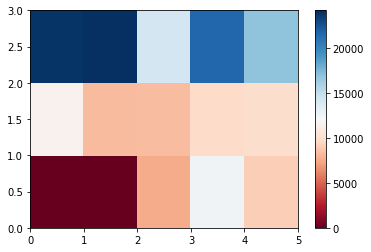

In [71]:
#use the grouped results
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

The heatmap plots the target variable (price) proportional to colour with respect to the variables 'drive-wheel' and 'body-style' on the vertical and horizontal axis, respectively. This allows us to visualize how the price is related to 'drive-wheel' and 'body-style'.

The default labels convey no useful information to us. Let's change that:

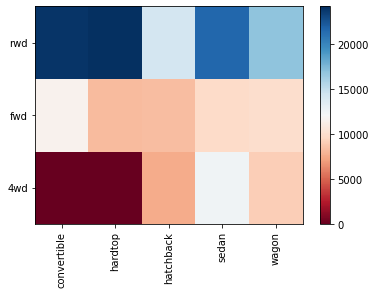

In [72]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

La visualización es muy importante en la ciencia de datos, y los paquetes de visualización de Python brindan una gran libertad. Profundizaremos más en un curso separado de visualizaciones de Python.

La pregunta principal que queremos responder en este módulo es: "¿Cuáles son las características principales que tienen un mayor impacto en el precio del automóvil?".

Para obtener una mejor medida de las características importantes, observamos la correlación de estas variables con el precio del automóvil. En otras palabras: ¿cómo depende el precio del automóvil de esta variable?

##5. Correlation and Causation

**Correlación:** una medida del grado de interdependencia entre variables.

**Causalidad:** la relación entre causa y efecto entre dos variables.

Es importante saber la diferencia entre estos dos. La correlación no implica causa. Determinar la correlación es mucho más simple que determinar la causalidad, ya que la causalidad puede requerir una experimentación independiente.

**Correlación de Pearson**

La Correlación de Pearson mide la dependencia lineal entre dos variables X e Y.

El coeficiente resultante es un valor entre -1 y 1 inclusive, donde:

1: Correlación lineal positiva perfecta.
0: Sin correlación lineal, lo más probable es que las dos variables no se afecten entre sí.
-1: Correlación lineal negativa perfecta.
La correlación de Pearson es el método predeterminado de la función "corr". Como antes, podemos calcular la Correlación de Pearson de las variables 'int64' o 'float64'.

In [73]:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


A veces nos gustaría saber el significado de la correlación estimada.

**valor p**

¿Cuál es este valor P? El valor P es el valor de probabilidad de que la correlación entre estas dos variables sea estadísticamente significativa. Normalmente, elegimos un nivel de significancia de 0.05, lo que significa que estamos 95% seguros de que la correlación entre las variables es significativa.

p-value is  
<
<
  0.001: we say there is strong evidence that the correlation is significant.
the p-value is  
<
<
  0.05: there is moderate evidence that the correlation is significant.
the p-value is  
<
<
  0.1: there is weak evidence that the correlation is significant.
the p-value is  
>
>
  0.1: there is no evidence that the correlation is significant.
   0,1: no hay evidencia de que la correlación sea significativa.
Podemos obtener esta información usando el módulo "stats" en la biblioteca "scipy".

We can obtain this information using "stats" module in the "scipy" library.

In [74]:
from scipy import stats

##**Wheel-Base vs. Price**
Calculemos el coeficiente de correlación de Pearson y el valor P de la 'distancia entre ejes' y el 'precio'.

In [75]:
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.584641822265508  with a P-value of P = 8.076488270733218e-20


**Conclusion:**

Since the p-value is  
<
<
  0.001, the correlation between wheel-base and price is statistically significant, although the linear relationship isn't extremely strong (~0.585).

**Horsepower vs. Price**

Let's calculate the Pearson Correlation Coefficient and P-value of 'horsepower' and 'price'.

In [76]:
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.8095745670036559  with a P-value of P =  6.369057428260101e-48


**Conclusion:**

Since the p-value is  
<
<
  0.001, the correlation between horsepower and price is statistically significant, and the linear relationship is quite strong (~0.809, close to 1).

###**Length vs. Price**


Let's calculate the Pearson Correlation Coefficient and P-value of 'length' and 'price'.

In [77]:
pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.6906283804483638  with a P-value of P =  8.016477466159556e-30


**Conclusion:**

Since the p-value is  
<
<
  0.001, the correlation between length and price is statistically significant, and the linear relationship is moderately strong (~0.691).

###Width vs. Price

Let's calculate the Pearson Correlation Coefficient and P-value of 'width' and 'price':

In [78]:
pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value ) 

The Pearson Correlation Coefficient is 0.7512653440522673  with a P-value of P = 9.200335510481646e-38


**Conclusion:**

Since the p-value is < 0.001, the correlation between width and price is statistically significant, and the linear relationship is quite strong (~0.751).

###Curb-Weight vs. Price
Let's calculate the Pearson Correlation Coefficient and P-value of 'curb-weight' and 'price':

In [79]:
pearson_coef, p_value = stats.pearsonr(df['curb-weight'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.8344145257702843  with a P-value of P =  2.189577238894065e-53


**Conclusion:**

Since the p-value is  
<
<
  0.001, the correlation between curb-weight and price is statistically significant, and the linear relationship is quite strong (~0.834).

###Engine-Size vs. Price

In [80]:
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.8723351674455185  with a P-value of P = 9.265491622198389e-64


**Conclusion:**

Since the p-value is  
<
<
  0.001, the correlation between engine-size and price is statistically significant, and the linear relationship is very strong (~0.872)

###Bore vs. Price
Let's calculate the Pearson Correlation Coefficient and P-value of 'bore' and 'price':

In [81]:
pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =  ", p_value ) 


The Pearson Correlation Coefficient is 0.5431553832626602  with a P-value of P =   8.049189483935489e-17


**Conclusion:**

Since the p-value is  
<
<
  0.001, the correlation between bore and price is statistically significant, but the linear relationship is only moderate (~0.521).

We can relate the process for each 'city-mpg' and 'highway-mpg':

###City-mpg vs. Price

In [82]:
pearson_coef, p_value = stats.pearsonr(df['city-mpg'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is -0.6865710067844678  with a P-value of P =  2.321132065567641e-29


**Conclusion:**

Since the p-value is  
<
<
  0.001, the correlation between city-mpg and price is statistically significant, and the coefficient of about -0.687 shows that the relationship is negative and moderately strong.

###Highway-mpg vs. Price

pearson_coef, p_value = stats.pearsonr(df['highway-mpg'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value ) 

**Conclusion:**

Since the p-value is < 0.001, the correlation between highway-mpg and price is statistically significant, and the coefficient of about -0.705 shows that the relationship is negative and moderately strong.

##6. ANOVA

**ANOVA: Analysis of Variance**

The Analysis of Variance (ANOVA) is a statistical method used to test whether there are significant differences between the means of two or more groups. ANOVA returns two parameters:

F-test score: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score. A larger score means there is a larger difference between the means.

P-value: P-value tells how statistically significant our calculated score value is.

If our price variable is strongly correlated with the variable we are analyzing, we expect ANOVA to return a sizeable F-test score and a small p-value.

##Drive Wheels
Since ANOVA analyzes the difference between different groups of the same variable, the groupby function will come in handy. Because the ANOVA algorithm averages the data automatically, we do not need to take the average before hand.

To see if different types of 'drive-wheels' impact 'price', we group the data.

In [83]:
grouped_test2=df_gptest[['drive-wheels', 'price']].groupby(['drive-wheels'])
grouped_test2.head(2)

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
136,4wd,7603.0


In [84]:
df_gptest

,drive-wheels,body-style,price
0,rwd,convertible,13495.0
1,rwd,convertible,16500.0
2,rwd,hatchback,16500.0
3,fwd,sedan,13950.0
4,4wd,sedan,17450.0
...,...,...,...
196,rwd,sedan,16845.0
197,rwd,sedan,19045.0
198,rwd,sedan,21485.0
199,rwd,sedan,22470.0


We can obtain the values of the method group using the method "get_group".

In [85]:
grouped_test2.get_group('4wd')['price']

4      17450.0
136     7603.0
140     9233.0
141    11259.0
144     8013.0
145    11694.0
150     7898.0
151     8778.0
Name: price, dtype: float64

We can use the function 'f_oneway' in the module 'stats' to obtain the F-test score and P-value.

In [86]:
# ANOVA
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'], grouped_test2.get_group('4wd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)   


ANOVA results: F= 67.95406500780399 , P = 3.3945443577151245e-23


This is a great result with a large F-test score showing a strong correlation and a P-value of almost 0 implying almost certain statistical significance. But does this mean all three tested groups are all this highly correlated?

Let's examine them separately.

###fwd and rwd

In [87]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val )

ANOVA results: F= 130.5533160959111 , P = 2.2355306355677845e-23


Let's examine the other groups.

###4wd and rwd

In [88]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('rwd')['price'])  
   
print( "ANOVA results: F=", f_val, ", P =", p_val) 

ANOVA results: F= 8.580681368924756 , P = 0.004411492211225333


4wd and fwd

In [89]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('fwd')['price'])  
 
print("ANOVA results: F=", f_val, ", P =", p_val) 

ANOVA results: F= 0.665465750252303 , P = 0.41620116697845666


**Conclusion: Important Variables**

We now have a better idea of what our data looks like and which variables are important to take into account when predicting the car price. We have narrowed it down to the following variables:

Continuous numerical variables:

* Length
* Width
* Curb-weight
* Engine-size
* Horsepower
* City-mpg
* Highway-mpg
* Wheel-base
* Bore
Categorical variables:
* Drive-wheels

As we now move into building machine learning models to automate our analysis, feeding the model with variables that meaningfully affect our target variable will improve our model's prediction performance.

#**Evidencia Preguntas**

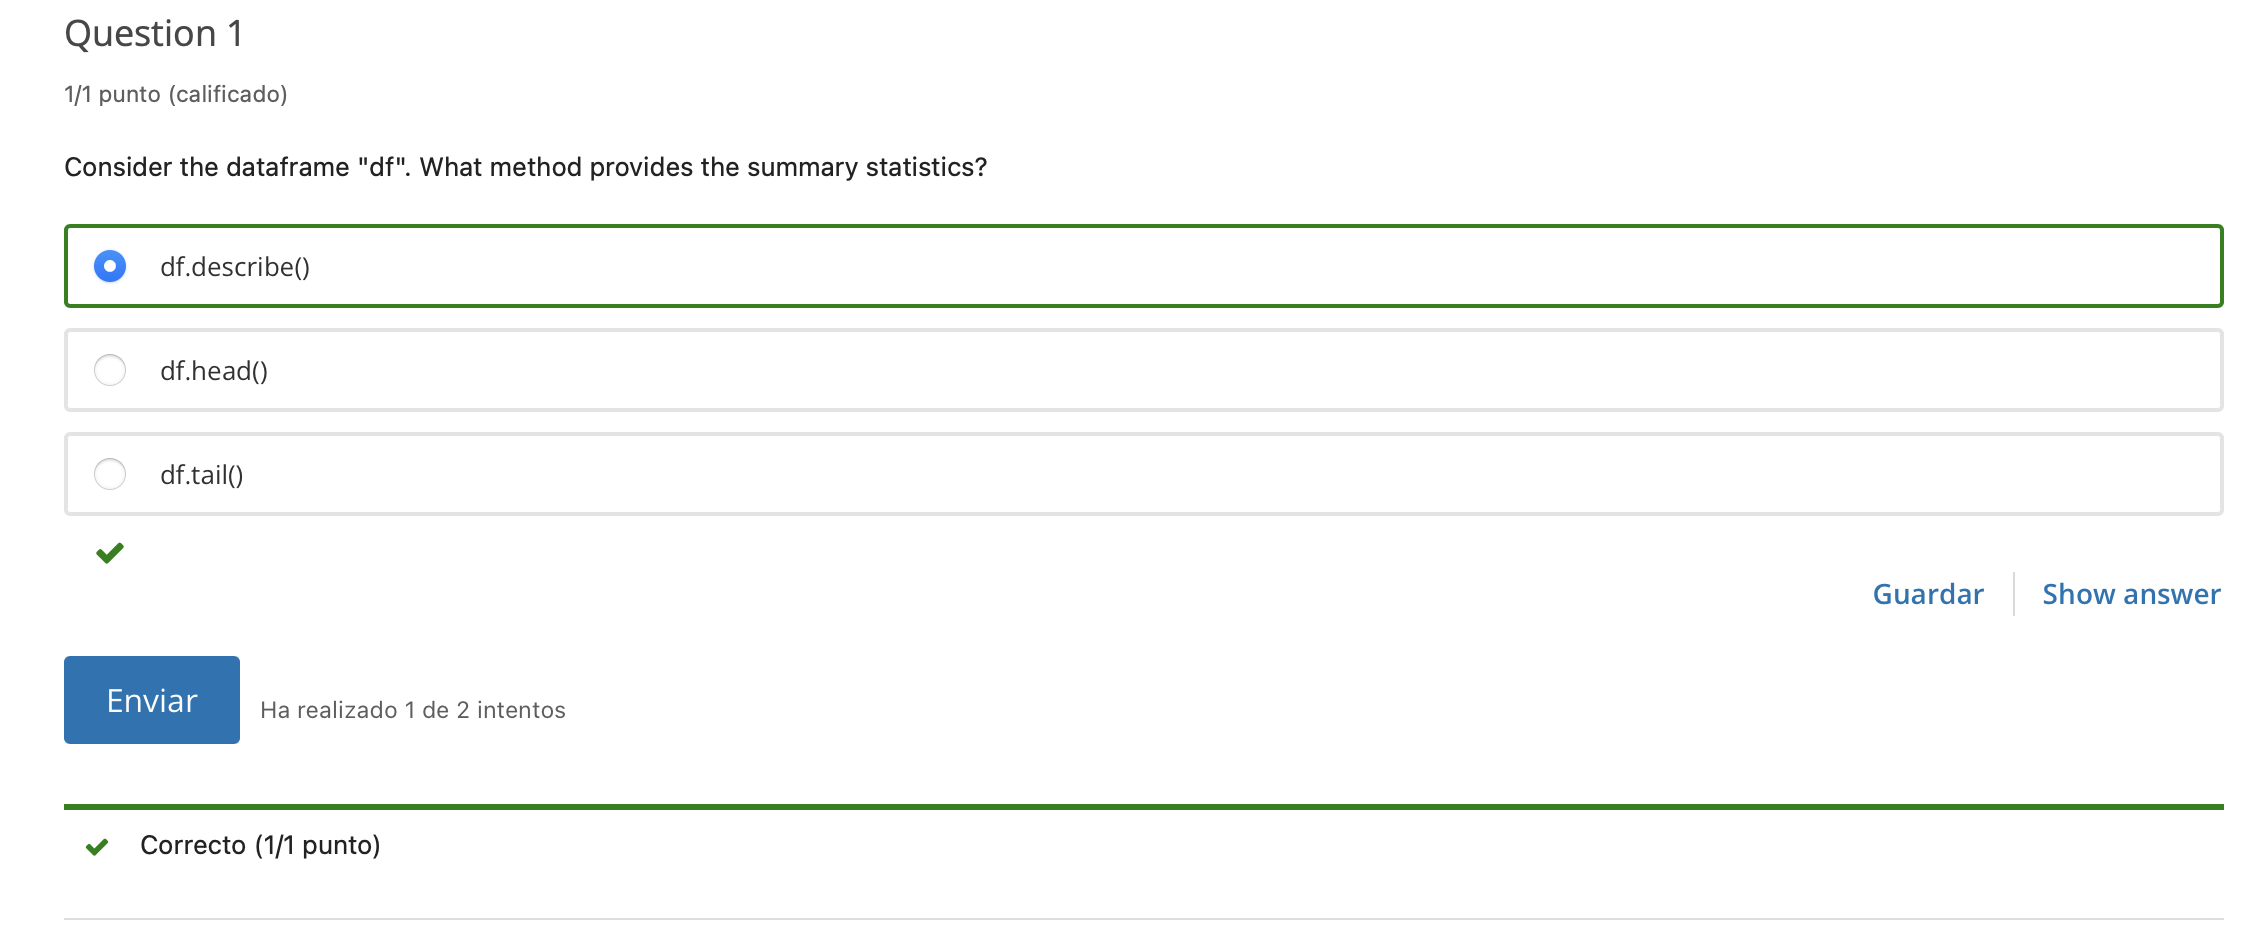

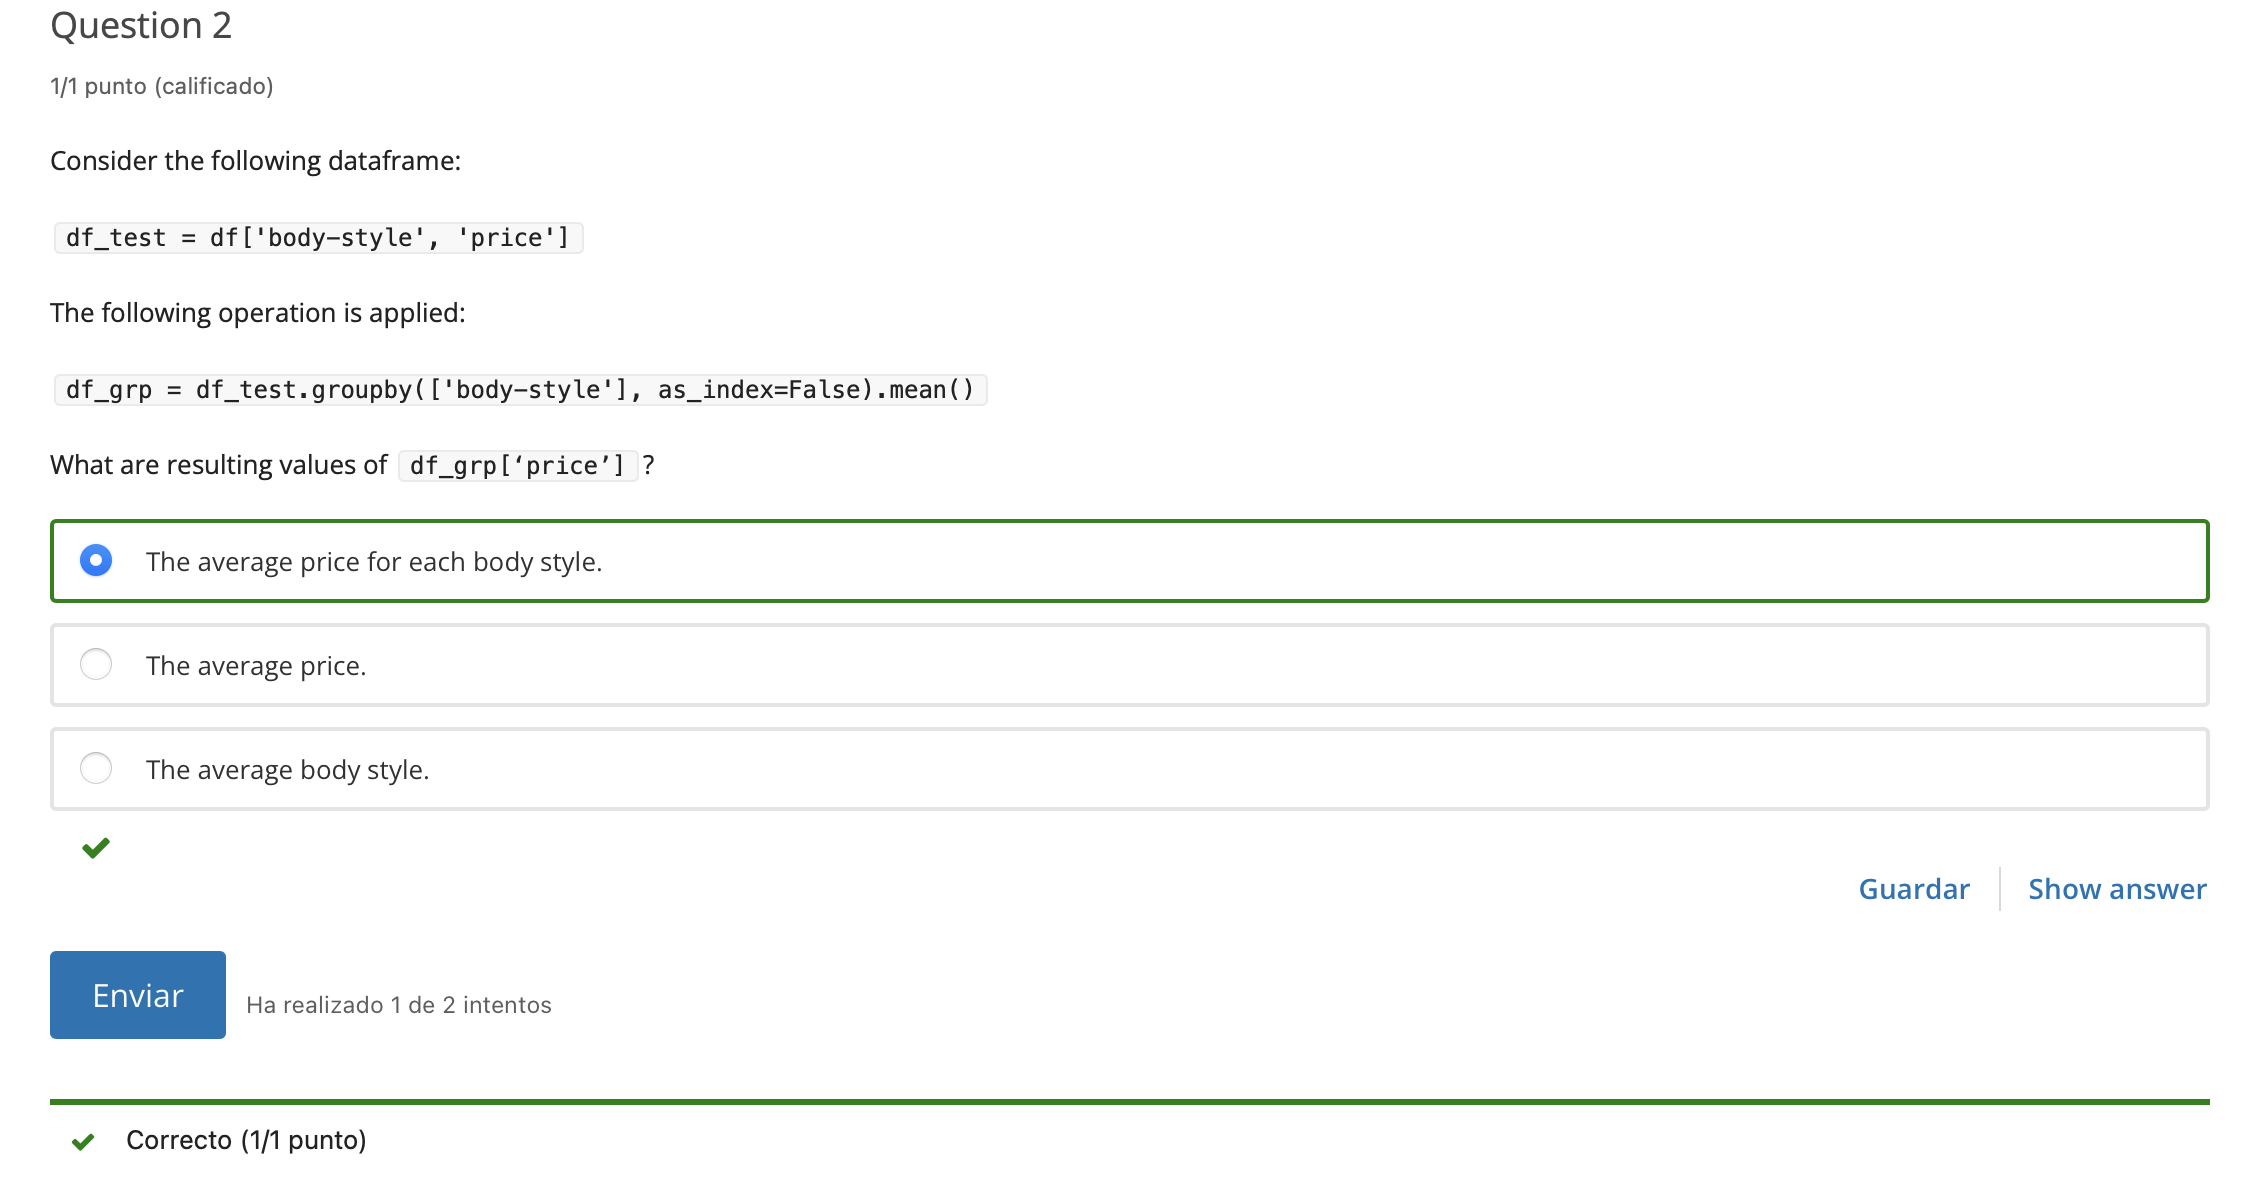

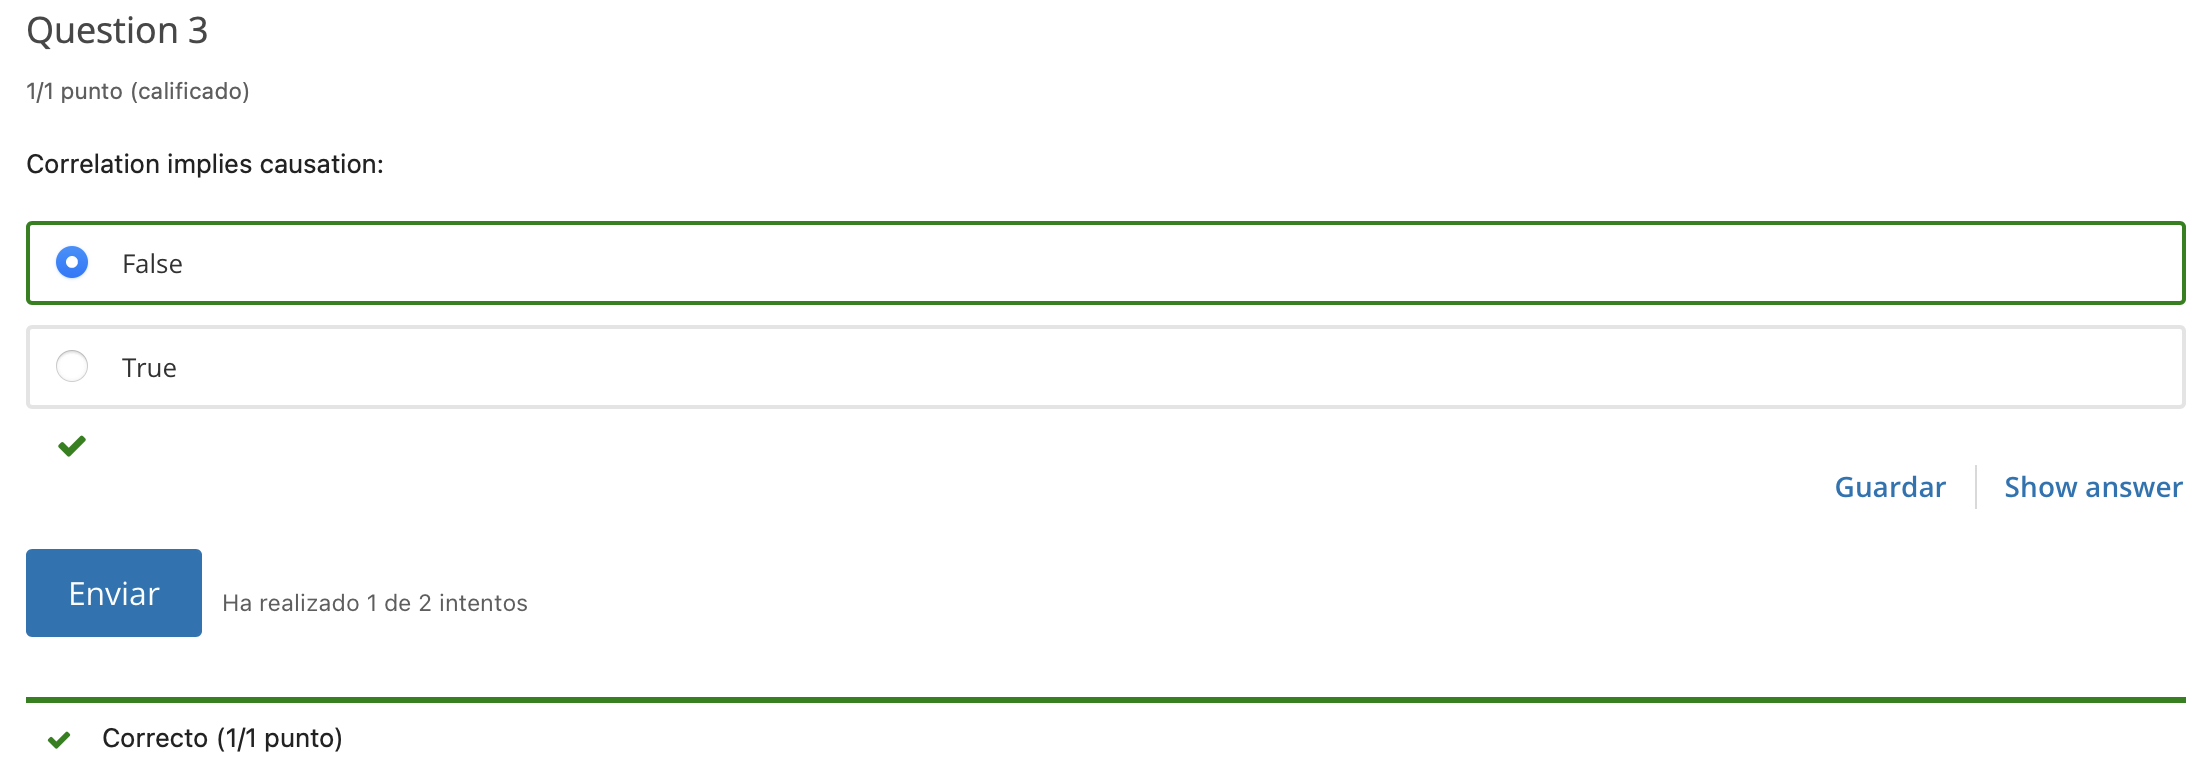

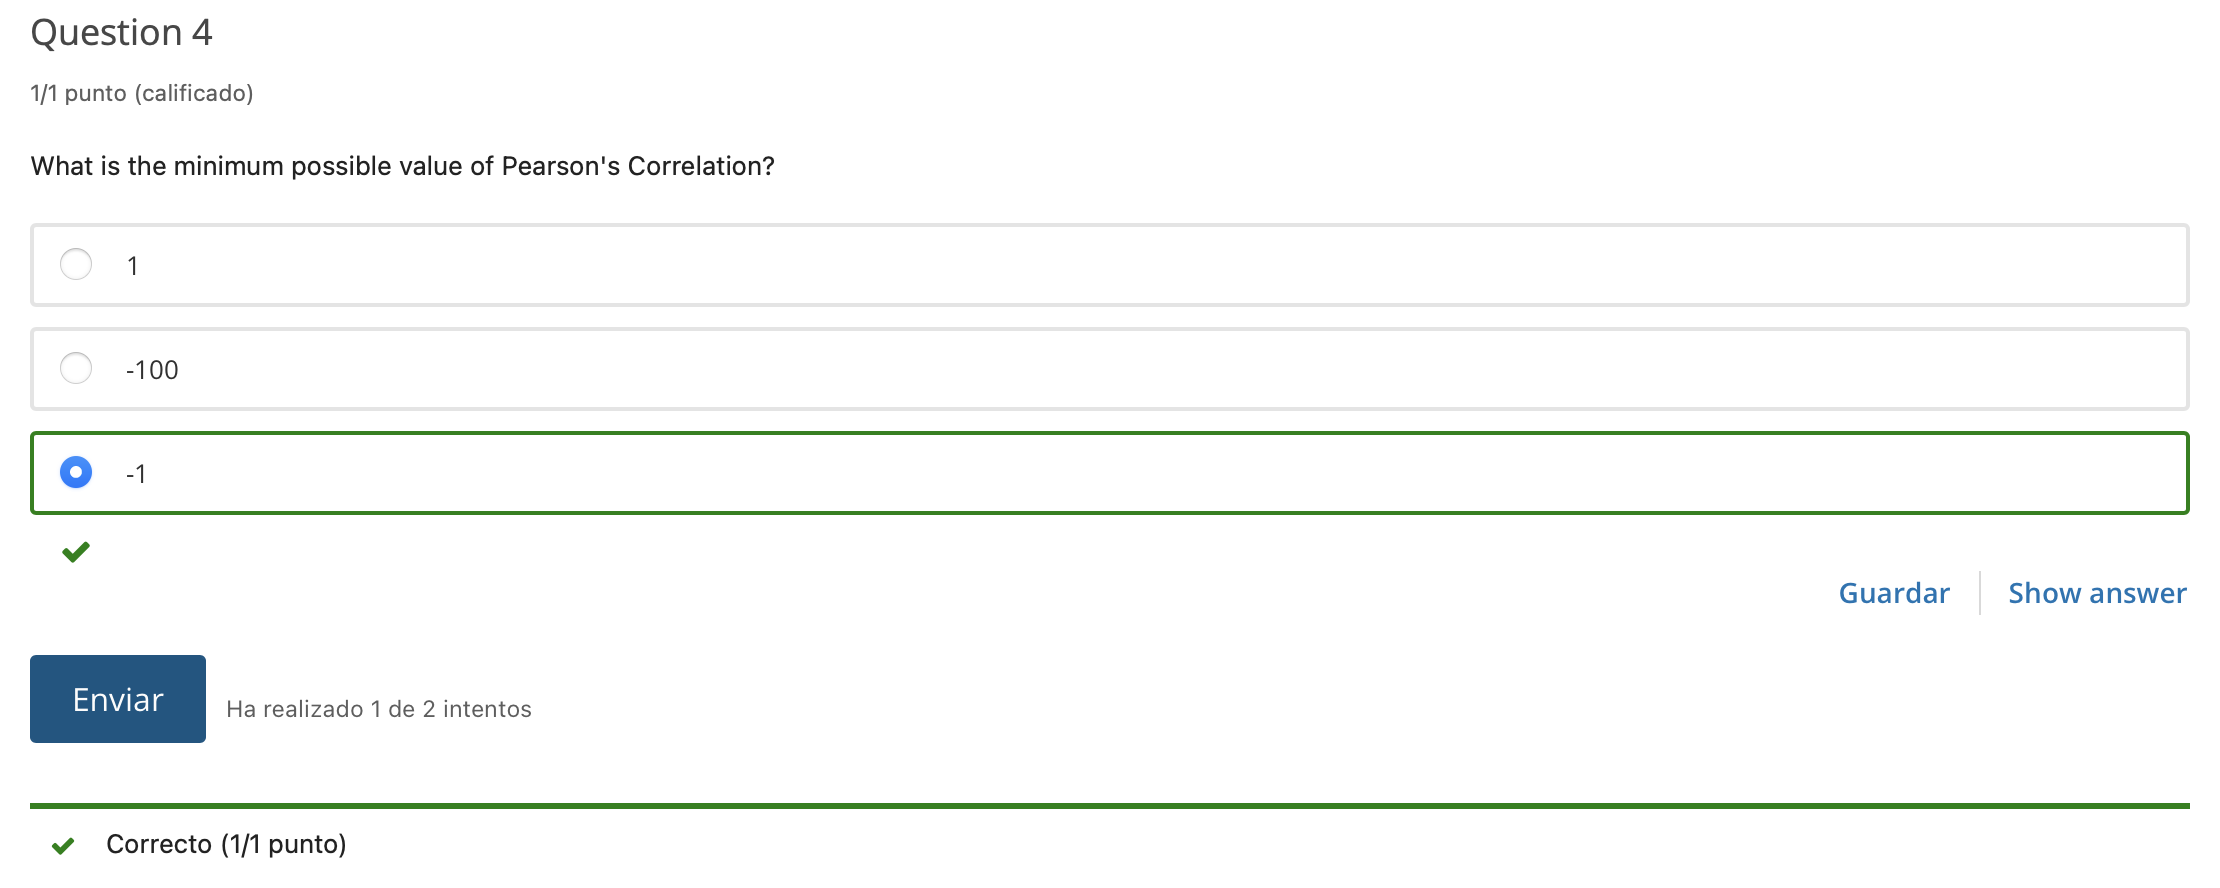

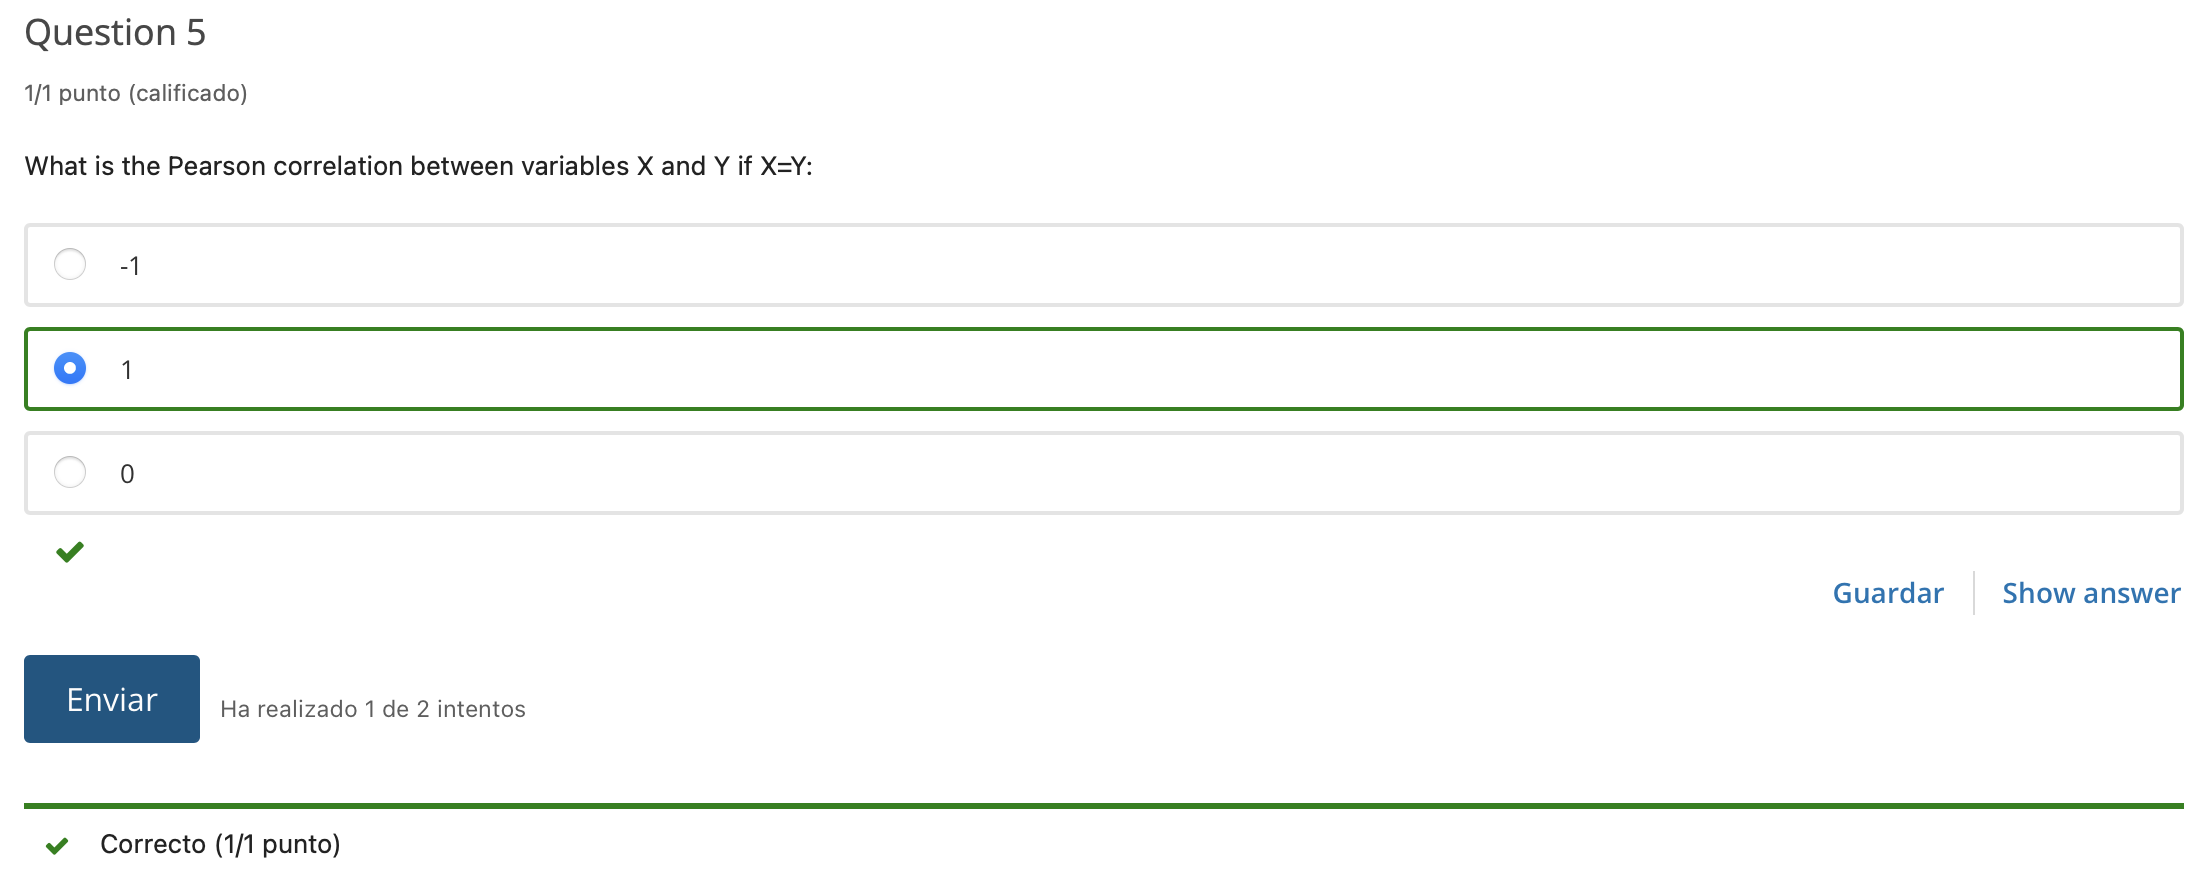



---


#**FIN**


---




